In [192]:
import numpy as np
import math
import random
import matplotlib.pyplot as plt

In [159]:
total_analysts = 14
analyst_chance = 0.156
min_job_time = 15.7
max_job_time = 33.1
node_capacity = 72
node_cost = 130
third_node_cost = 110

def get_maximum_cost():
    maximum_use = total_analysts * max_job_time; 
    maximum_nodes = maximum_use / node_capacity
    maximum_cost = 0
    
    for i in range(math.ceil(maximum_nodes)):
        if i < 2:
            maximum_cost += node_cost
        else:
            maximum_cost += third_node_cost

    print("Maximum cost for 1 day",maximum_cost)
    
get_maximum_cost()

Maximum cost for 1 day 810


In [249]:
def get_cost_by_chance():
    
    nodes_in_use = 0
    day_cost = 0

    for j in range(total_analysts):
        analyst_have_to_work = np.random.random()

        if analyst_have_to_work <= analyst_chance:
            job_time = random.randrange(min_job_time*10, (max_job_time+1)*10) / 10
            nodes_in_use = nodes_in_use + (job_time /node_capacity)
            print('analist #', j, 'works', job_time)

    for i in range(math.ceil(nodes_in_use)):
        if i < 2:
            day_cost += node_cost
        else:
            day_cost += third_node_cost

    print("Random cost for 1 day", day_cost)
    return day_cost
        

def get_montecarlo_costs(num_trials: int):
    costs = []
    for i in range(num_trials):
        costs.append(get_cost_by_chance())

    return costs
    
print(get_montecarlo_costs(1))


Random cost for 1 day 0
[0]


[0, 130, 130, 130, 130, 130, 130, 370, 130, 130, 130, 130, 260, 130, 260, 260, 130, 130, 130, 260, 130, 260, 130, 130, 260, 130, 260, 130, 130, 130, 130, 130, 130, 130, 0, 0, 260, 130, 260, 130, 130, 0, 130, 130, 260, 130, 260, 0, 130, 130, 130, 260, 260, 130, 260, 130, 130, 260, 130, 130, 260, 130, 0, 130, 260, 130, 130, 260, 260, 130, 260, 130, 0, 130, 130, 130, 0, 130, 130, 130, 130, 130, 260, 130, 0, 260, 260, 130, 0, 130, 130, 130, 0, 130, 260, 130, 260, 130, 130, 130]


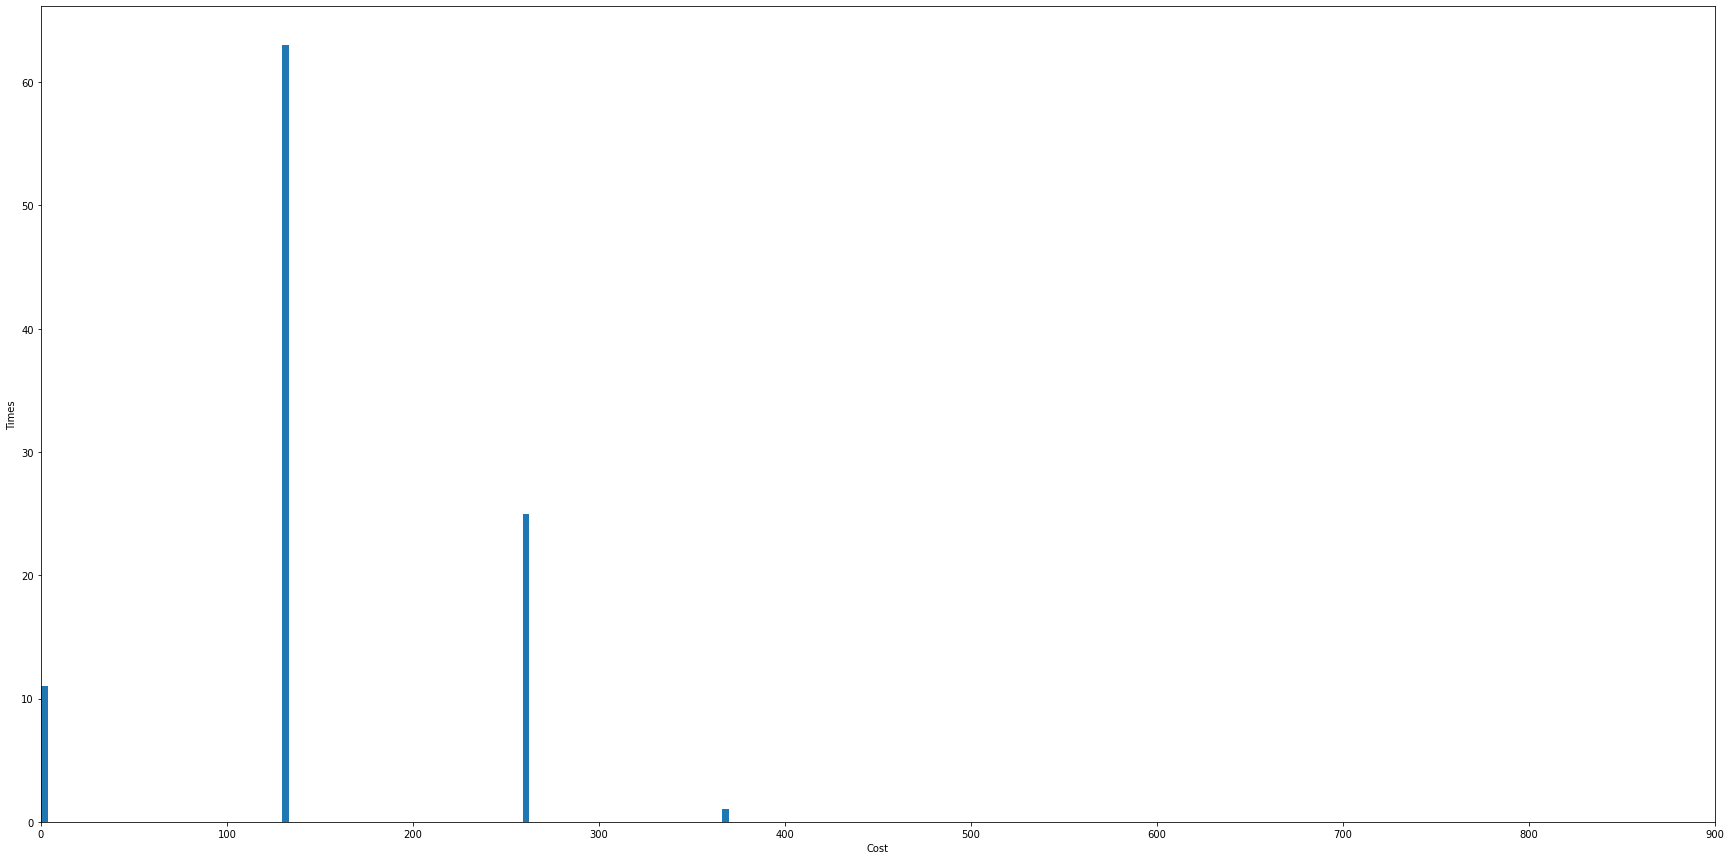

In [211]:
result = get_montecarlo_costs(100)
print(result)
plt.figure(figsize=(30, 15))
plt.xlabel('Cost')
plt.ylabel('Times')
plt.xlim(0,900)
#plt.suptitle('10 tiradas fair + cheat', fontsize=32)
_ = plt.hist(result, bins=100)